<h1> I. Load the data from Github

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Carlita99/dataset-project/master/Timeseries-data.csv'
df = pd.read_csv(url, error_bad_lines=False, engine="python")
print("First five elements\n")
print(df.head(5))
print("\nLast five elements\n")
print(df.tail(5))
print("\n Size:", df.size)

First five elements

             Date Time       P      Rho     T
0  01.01.2009 00:10:00  996.52  1307.75 -8.02
1  01.01.2009 00:20:00  996.57  1309.80 -8.41
2  01.01.2009 00:30:00  996.53  1310.24 -8.51
3  01.01.2009 00:40:00  996.51  1309.19 -8.31
4  01.01.2009 00:50:00  996.51  1309.00 -8.27

Last five elements

                  Date Time        P      Rho     T
420546  31.12.2016 23:20:00  1000.07  1292.98 -4.05
420547  31.12.2016 23:30:00   999.93  1289.44 -3.35
420548  31.12.2016 23:40:00   999.82  1288.39 -3.16
420549  31.12.2016 23:50:00   999.81  1293.56 -4.23
420550  01.01.2017 00:00:00   999.82  1296.38 -4.82

 Size: 1682204


<h1> II. Choose the dates from 01/01/2009 till 31/07/2009

<h3> 1- Convert the Date Time column into datetime </h3>

In [ ]:
df["Date Time"] = pd.to_datetime(df["Date Time"], format="%d.%m.%Y %H:%M:%S")
print("First five elements\n")
print(df.head(5))
print("\nLast five elements\n")
print(df.tail(5))
print("\n Size:", df.size)

First five elements

            Date Time       P      Rho     T
0 2009-01-01 00:10:00  996.52  1307.75 -8.02
1 2009-01-01 00:20:00  996.57  1309.80 -8.41
2 2009-01-01 00:30:00  996.53  1310.24 -8.51
3 2009-01-01 00:40:00  996.51  1309.19 -8.31
4 2009-01-01 00:50:00  996.51  1309.00 -8.27

Last five elements

                 Date Time        P      Rho     T
420546 2016-12-31 23:20:00  1000.07  1292.98 -4.05
420547 2016-12-31 23:30:00   999.93  1289.44 -3.35
420548 2016-12-31 23:40:00   999.82  1288.39 -3.16
420549 2016-12-31 23:50:00   999.81  1293.56 -4.23
420550 2017-01-01 00:00:00   999.82  1296.38 -4.82

 Size: 1682204


<h3> 2- Pick the correct dates and put them in a new dataframe </h3>

In [ ]:
mask = (df['Date Time'] >= '01.01.2009 00:00:00') & (df['Date Time'] < '01.08.2009 00:00:00')
dfPicked = df.loc[mask]
print("First five elements\n")
print(dfPicked.head(5))
print("\nLast five elements\n")
print(dfPicked.tail(5))
print("\n Size:", dfPicked.size)

First five elements

            Date Time       P      Rho     T
0 2009-01-01 00:10:00  996.52  1307.75 -8.02
1 2009-01-01 00:20:00  996.57  1309.80 -8.41
2 2009-01-01 00:30:00  996.53  1310.24 -8.51
3 2009-01-01 00:40:00  996.51  1309.19 -8.31
4 2009-01-01 00:50:00  996.51  1309.00 -8.27

Last five elements

               Date Time       P      Rho      T
1002 2009-01-07 23:10:00  998.05  1324.97 -10.99
1003 2009-01-07 23:20:00  998.11  1324.62 -10.91
1004 2009-01-07 23:30:00  998.22  1323.28 -10.62
1005 2009-01-07 23:40:00  998.33  1324.00 -10.73
1006 2009-01-07 23:50:00  998.41  1323.38 -10.59

 Size: 4028


<h3> 3- Plot the P, Rho and T values over time </h3>

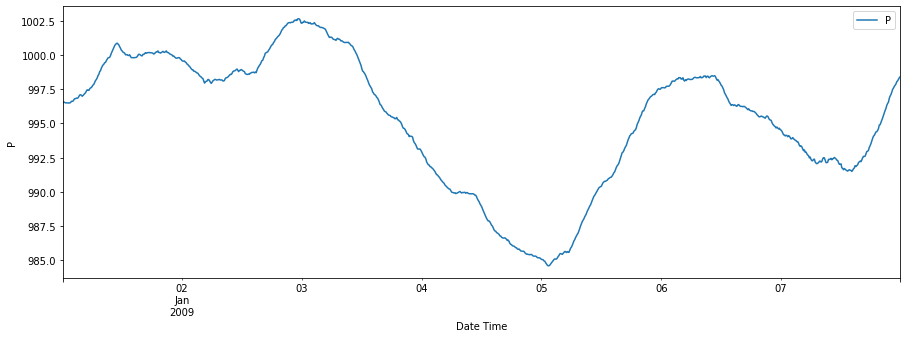

In [ ]:
import matplotlib.pyplot as plt

df_P = dfPicked.loc[:,['Date Time','P']]
df_P.set_index('Date Time',inplace=True)
df_P.plot(figsize=(15,5))
plt.ylabel('P')
plt.show()

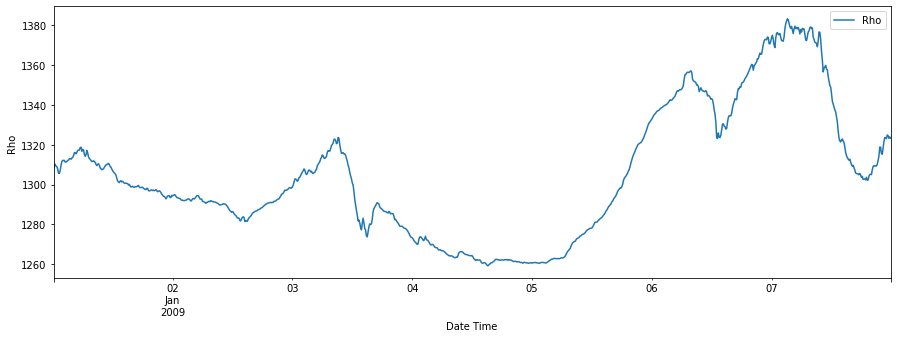

In [ ]:
df_Rho = dfPicked.loc[:,['Date Time','Rho']]
df_Rho.set_index('Date Time',inplace=True)
df_Rho.plot(figsize=(15,5))
plt.ylabel('Rho')
plt.show()

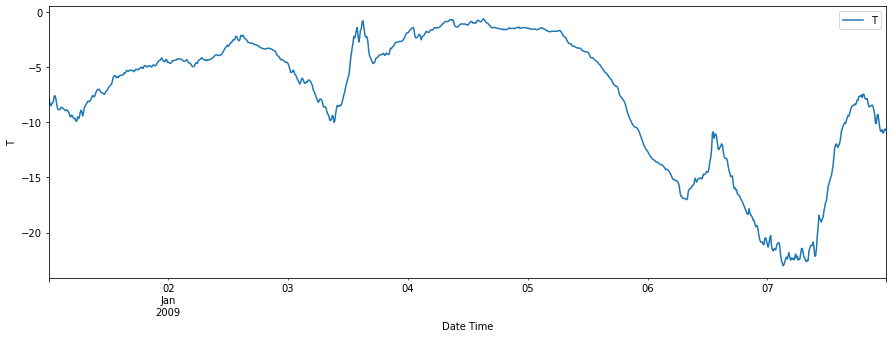

In [ ]:
df_T = dfPicked.loc[:,['Date Time','T']]
df_T.set_index('Date Time',inplace=True)
df_T.plot(figsize=(15,5))
plt.ylabel('T')
plt.show()

<h1> III. Generate the test and train sets using TimeseriesGenerator </h1>


<h3> 1- Build the dataset as numpy array on the T column </h3>

In [ ]:
import numpy as np

dataset = dfPicked["T"].values
print(dataset.shape)
dataset = np.reshape(dataset, (-1,1))
print(dataset.shape)
print(dataset)

(1007,)
(1007, 1)
[[ -8.02]
 [ -8.41]
 [ -8.51]
 ...
 [-10.62]
 [-10.73]
 [-10.59]]


<h3> 2- Normalize the data [0,1] using MinMaxScaler</h3>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)

[[0.66979446]
 [0.65236819]
 [0.64789991]
 ...
 [0.5536193 ]
 [0.5487042 ]
 [0.55495979]]


<h3> 3- Split the test and train with 80% as training set </h3>

In [ ]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print("First 5 elements in the Train set: ")
print(train[:5,:1])
print("Train set size: ", train.shape)
print("\nFirst 5 elements in the Test set: ")
print(test[:5,:1])
print("Test set size: ", test.shape)

First 5 elements in the Train set: 
[[0.66979446]
 [0.65236819]
 [0.64789991]
 [0.65683646]
 [0.65862377]]
Train set size:  (805, 1)

First 5 elements in the Test set: 
[[0.47095621]
 [0.47989276]
 [0.48346738]
 [0.49374441]
 [0.48972297]]
Test set size:  (202, 1)


<h3> 4- Build the train and test sets using TimeseriesGenerator</h3>

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

trainGenerated = TimeseriesGenerator(train,train,length=2,sampling_rate=1,stride=1,batch_size=10)
print(trainGenerated)
print("Size of the generated train set :", len(trainGenerated))

testGenerated = TimeseriesGenerator(test,test,length=2,sampling_rate=1,stride=1,batch_size=1)
print(testGenerated)
print("Size of the generated test set:", len(testGenerated))

Size of the generated train set : 81
Size of the generated test set: 200


<h1> IV. Univariate Forecasting model </h1>

<h3>1- Define the model </h3>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

univariateModel = Sequential()
univariateModel.add(LSTM(40, input_shape=(2,1),return_sequences=True))
univariateModel.add(Dropout(0.2))
univariateModel.add(LSTM(20))
univariateModel.add(Dense(1))
univariateModel.compile(optimizer='adam', loss='mse')

<h3>2- Plot the model </h3>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 40)             6720      
                                                                 
 dropout (Dropout)           (None, 2, 40)             0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                4880      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 11,621
Trainable params: 11,621
Non-trainable params: 0
_________________________________________________________________


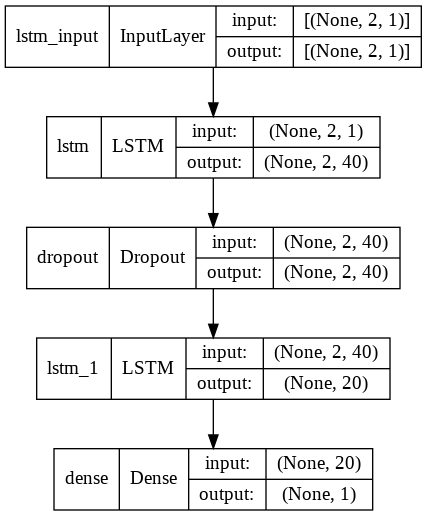

In [ ]:
univariateModel.summary()
univariateModel.compile(optimizer='adam', loss='mse')

from keras.utils.vis_utils import plot_model
plot_model(univariateModel, to_file='univariateModel.png', show_shapes=True)
from IPython.display import Image
Image(filename='univariateModel.png') 

<h3>3-Train the model </h3>

In [ ]:
history = univariateModel.fit(trainGenerated, epochs=50, validation_data=testGenerated, verbose=0, shuffle=True)

<h3>4- Predict for both test and train sets </h3>

In [ ]:
trainPredicted = univariateModel.predict(trainGenerated)
testPredicted = univariateModel.predict(testGenerated)
print("First 5 elements in the Train Predicted set: ")
print(trainPredicted[:5,:1])
print("Train Predicted set size: ", trainPredicted.shape)
print("\nFirst 5 elements in the Test Predicted set: ")
print(testPredicted[:5,:1])
print("Test Predicted set size: ", testPredicted.shape)

First 5 elements in the Train Predicted set: 
[[0.66030854]
 [0.6459595 ]
 [0.6448593 ]
 [0.65208685]
 [0.6559551 ]]
Train Predicted set size:  (803, 1)

First 5 elements in the Test Predicted set: 
[[0.4665425 ]
 [0.47410843]
 [0.47936186]
 [0.48603544]
 [0.47618607]]
Test Predicted set size:  (200, 1)


<h3>5- Rescale the test and train predicted values back to the initial range</h3>

In [ ]:
trainPredicted = scaler.inverse_transform(trainPredicted)
testPredicted = scaler.inverse_transform(testPredicted)
print("First 5 elements in the rescaled Train Predicted set: ")
print(trainPredicted[:5,:1])
print("Rescaled Train Predicted set size: ", trainPredicted.shape)
print("\nFirst 5 elements in the rescaled Test Predicted set: ")
print(testPredicted[:5,:1])
print("Rescaled Test Predicted set size: ", testPredicted.shape)

First 5 elements in the rescaled Train Predicted set: 
[[-8.232295]
 [-8.553427]
 [-8.578049]
 [-8.416296]
 [-8.329725]]
Rescaled Train Predicted set size:  (803, 1)

First 5 elements in the rescaled Test Predicted set: 
[[-12.568778]
 [-12.399453]
 [-12.281881]
 [-12.132526]
 [-12.352955]]
Rescaled Test Predicted set size:  (200, 1)


<h3> 6- Get the Y targets from the created test and train generators </h3>

In [ ]:
def getY(setGenerated):
    y = None
    for i in range(len(setGenerated)):
        x = setGenerated[i][1]
        if y is None:
            y = x
        else:
            y = np.append(y, x)
    y = y.reshape((-1,1))
    return y

trainY = getY(trainGenerated)
testY = getY(testGenerated)
print("First 5 elements in the TrainY set: ")
print(trainY[:5,:1])
print("TrainY set size: ", trainY.shape)
print("\nFirst 5 elements in the TestY set: ")
print(testY[:5,:1])
print("TestY set size: ", testY.shape)

First 5 elements in the TrainY set: 
[[0.64789991]
 [0.65683646]
 [0.65862377]
 [0.66845398]
 [0.68766756]]
TrainY set size:  (803, 1)

First 5 elements in the TestY set: 
[[0.48346738]
 [0.49374441]
 [0.48972297]
 [0.46246649]
 [0.4432529 ]]
TestY set size:  (200, 1)


<h3>7- Rescale the Y targets to the initial range </h3>

In [ ]:
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)
print("First 5 elements in the rescaled TrainY set: ")
print(trainY[:5,:1])
print("Rescaled TrainY set size: ", trainY.shape)
print("\nFirst 5 elements in the rescaled TestY set: ")
print(testY[:5,:1])
print("Rescaled TestY set size: ", testY.shape)

First 5 elements in the rescaled TrainY set: 
[[-8.51]
 [-8.31]
 [-8.27]
 [-8.05]
 [-7.62]]
Rescaled TrainY set size:  (803, 1)

First 5 elements in the rescaled TestY set: 
[[-12.19]
 [-11.96]
 [-12.05]
 [-12.66]
 [-13.09]]
Rescaled TestY set size:  (200, 1)


<h3>7- RMSE and MAE </h3>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Train RMSE:',np.sqrt(mean_squared_error(trainY, trainPredicted)))
print('Test RMSE:',np.sqrt(mean_squared_error(testY, testPredicted)))
print('Train MAE:', mean_absolute_error(trainY, trainPredicted))
print('Test MAE:', mean_absolute_error(testY, testPredicted))

Train RMSE: 0.2902789320911909
Test RMSE: 0.5766799973999849
Train MAE: 0.2034595258298282
Test MAE: 0.4695259683609008


<h3> 8- Plot the loss values </h3>

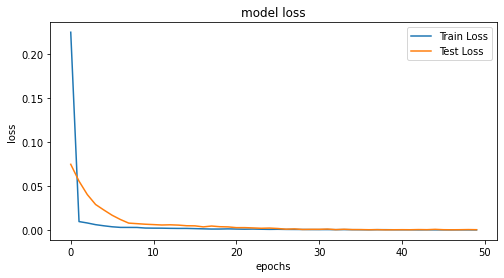

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

<h3>9- Plot the original and predicted train data </h3>

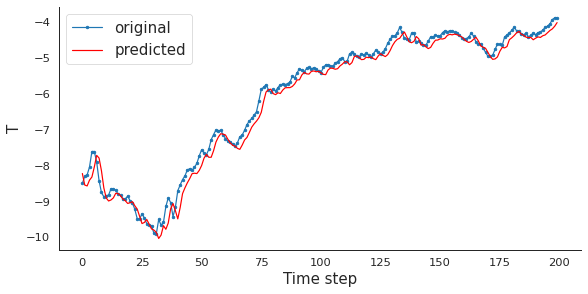

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, trainY[:200], marker='.', label="original")
plt.plot(X_data, trainPredicted[:200], 'r', label="predicted")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('T', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

<h3>10- Plot the original and predicted test data </h3>

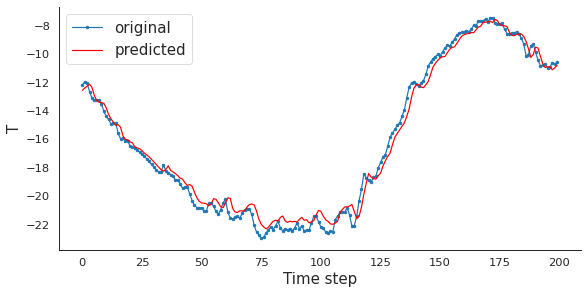

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, testY[:200], marker='.', label="original")
plt.plot(X_data, testPredicted[:200], 'r', label="predicted")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('T', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

<h1> V. Multivariate Forecasting model </h1>

<h3> 1- Build the input and output datasets </h3>

In [ ]:
inputDataset1 = dfPicked["P"].values
print(inputDataset1.shape)
inputDataset1 = np.reshape(inputDataset1, (-1,1))
print(inputDataset1.shape)
print(inputDataset1)

(1007,)
(1007, 1)
[[996.52]
 [996.57]
 [996.53]
 ...
 [998.22]
 [998.33]
 [998.41]]


In [ ]:
inputDataset2 = dfPicked["Rho"].values
print(inputDataset2.shape)
inputDataset2 = np.reshape(inputDataset2, (-1,1))
print(inputDataset2.shape)
print(inputDataset2)

(1007,)
(1007, 1)
[[1307.75]
 [1309.8 ]
 [1310.24]
 ...
 [1323.28]
 [1324.  ]
 [1323.38]]


In [ ]:
outputDataset = dfPicked["T"].values
print(outputDataset.shape)
outputDataset = np.reshape(outputDataset, (-1,1))
print(outputDataset.shape)
print(outputDataset)

(1007,)
(1007, 1)
[[ -8.02]
 [ -8.41]
 [ -8.51]
 ...
 [-10.62]
 [-10.73]
 [-10.59]]


<h3> 2- Horizontally stack the input datasets </h3>

In [ ]:
from numpy import hstack

inputDataset = hstack((inputDataset1, inputDataset2))
print(inputDataset)

[[ 996.52 1307.75]
 [ 996.57 1309.8 ]
 [ 996.53 1310.24]
 ...
 [ 998.22 1323.28]
 [ 998.33 1324.  ]
 [ 998.41 1323.38]]


<h3> 3- Normalize the data [0,1] using MinMaxScaler</h3>

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
inputDataset = scaler.fit_transform(inputDataset)
outputDataset = scaler.fit_transform(outputDataset)
print("Input dataset: ")
print(inputDataset)
print("\n output dataset: ")
print(outputDataset)

Input dataset: 
[[0.66038781 0.39101377]
 [0.66315789 0.40752073]
 [0.66094183 0.41106369]
 ...
 [0.75457064 0.5160641 ]
 [0.76066482 0.52186166]
 [0.76509695 0.51686931]]

 output dataset: 
[[0.66979446]
 [0.65236819]
 [0.64789991]
 ...
 [0.5536193 ]
 [0.5487042 ]
 [0.55495979]]


<h3> 4- Split the test and train with 80% as training set </h3>

In [ ]:
train_size = int(len(inputDataset) * 0.80)
test_size = len(inputDataset) - train_size
train_x, test_x = inputDataset[0:train_size,:], inputDataset[train_size:len(inputDataset),:]
train_size = int(len(outputDataset) * 0.80)
test_size = len(outputDataset) - train_size
train_y, test_y = outputDataset[0:train_size,:], outputDataset[train_size:len(outputDataset),:]

print("First 5 elements in the Train x set: ")
print(train_x[:5,:1])
print("Train x set size: ", train_x.shape)
print("\nFirst 5 elements in the Test x set: ")
print(test_x[:5,:1])
print("Test x set size: ", test_x.shape)

print("First 5 elements in the Train y set: ")
print(train_y[:5,:1])
print("Train y set size: ", train_y.shape)
print("\nFirst 5 elements in the Test y set: ")
print(test_y[:5,:1])
print("Test y set size: ", test_y.shape)

First 5 elements in the Train x set: 
[[0.66038781]
 [0.66315789]
 [0.66094183]
 [0.6598338 ]
 [0.6598338 ]]
Train x set size:  (805, 2)

First 5 elements in the Test x set: 
[[0.65207756]
 [0.64875346]
 [0.65152355]
 [0.6498615 ]
 [0.6465374 ]]
Test x set size:  (202, 2)
First 5 elements in the Train y set: 
[[0.66979446]
 [0.65236819]
 [0.64789991]
 [0.65683646]
 [0.65862377]]
Train y set size:  (805, 1)

First 5 elements in the Test y set: 
[[0.47095621]
 [0.47989276]
 [0.48346738]
 [0.49374441]
 [0.48972297]]
Test y set size:  (202, 1)


<h3> 5- Build the train and test sets using TimeseriesGenerator</h3>

In [ ]:
trainGenerated = TimeseriesGenerator(train_x,train_y,length=2,sampling_rate=1,stride=1,batch_size=10)
print(trainGenerated)
print("Size of the generated train set :", len(trainGenerated))

testGenerated = TimeseriesGenerator(test_x,test_y,length=2,sampling_rate=1,stride=1,batch_size=1)
print(testGenerated)
print("Size of the generated test set:", len(testGenerated))

Size of the generated train set : 81
Size of the generated test set: 200


<h3>6- Define the model </h3>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

multivariateModel = Sequential()
multivariateModel.add(LSTM(40, input_shape=(2,1),return_sequences=True))
multivariateModel.add(Dropout(0.2))
multivariateModel.add(LSTM(20))
multivariateModel.add(Dense(1))
multivariateModel.compile(optimizer='adam', loss='mse')

<h3>7- Plot the model </h3>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 40)             6720      
                                                                 
 dropout_1 (Dropout)         (None, 2, 40)             0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                4880      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11,621
Trainable params: 11,621
Non-trainable params: 0
_________________________________________________________________


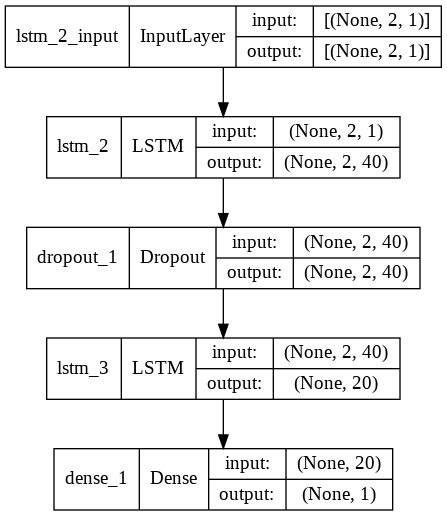

In [ ]:
multivariateModel.summary()
multivariateModel.compile(optimizer='adam', loss='mse')

plot_model(multivariateModel, to_file='multivariateModel.png', show_shapes=True)
Image(filename='multivariateModel.png') 

<h3>8-Train the model </h3>

In [ ]:
history = multivariateModel.fit(trainGenerated, epochs=50, validation_data=testGenerated, verbose=0, shuffle=True)

<h3>9- Predict for both test and train sets </h3>

In [ ]:
trainPredicted = multivariateModel.predict(trainGenerated)
testPredicted = multivariateModel.predict(testGenerated)
print("First 5 elements in the Train Predicted set: ")
print(trainPredicted[:5,:1])
print("Train Predicted set size: ", trainPredicted.shape)
print("\nFirst 5 elements in the Test Predicted set: ")
print(testPredicted[:5,:1])
print("Test Predicted set size: ", testPredicted.shape)

First 5 elements in the Train Predicted set: 
[[0.69820017]
 [0.6857098 ]
 [0.68574136]
 [0.69202256]
 [0.696153  ]]
Train Predicted set size:  (803, 1)

First 5 elements in the Test Predicted set: 
[[0.4885877 ]
 [0.49592808]
 [0.5017123 ]
 [0.5074898 ]
 [0.4959943 ]]
Test Predicted set size:  (200, 1)


<h3>10- Rescale the test and train predicted values back to the initial range</h3>

In [ ]:
trainPredicted = scaler.inverse_transform(trainPredicted)
testPredicted = scaler.inverse_transform(testPredicted)
print("First 5 elements in the rescaled Train Predicted set: ")
print(trainPredicted[:5,:1])
print("Rescaled Train Predicted set size: ", trainPredicted.shape)
print("\nFirst 5 elements in the rescaled Test Predicted set: ")
print(testPredicted[:5,:1])
print("Rescaled Test Predicted set size: ", testPredicted.shape)
outputDataset = scaler.inverse_transform(outputDataset)

First 5 elements in the rescaled Train Predicted set: 
[[-7.38428  ]
 [-7.6638155]
 [-7.6631083]
 [-7.5225353]
 [-7.430096 ]]
Rescaled Train Predicted set size:  (803, 1)

First 5 elements in the rescaled Test Predicted set: 
[[-12.075407]
 [-11.911129]
 [-11.781678]
 [-11.652378]
 [-11.909647]]
Rescaled Test Predicted set size:  (200, 1)


<h3> 11- Get the Y targets from the created test and train generators </h3>

In [ ]:
trainY = getY(trainGenerated)
testY = getY(testGenerated)
print("First 5 elements in the TrainY set: ")
print(trainY[:5,:1])
print("TrainY set size: ", trainY.shape)
print("\nFirst 5 elements in the TestY set: ")
print(testY[:5,:1])
print("TestY set size: ", testY.shape)

First 5 elements in the TrainY set: 
[[0.64789991]
 [0.65683646]
 [0.65862377]
 [0.66845398]
 [0.68766756]]
TrainY set size:  (803, 1)

First 5 elements in the TestY set: 
[[0.48346738]
 [0.49374441]
 [0.48972297]
 [0.46246649]
 [0.4432529 ]]
TestY set size:  (200, 1)


<h3>12- Rescale the Y targets to the initial range </h3>

In [ ]:
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)
print("First 5 elements in the rescaled TrainY set: ")
print(trainY[:5,:1])
print("Rescaled TrainY set size: ", trainY.shape)
print("\nFirst 5 elements in the rescaled TestY set: ")
print(testY[:5,:1])
print("Rescaled TestY set size: ", testY.shape)

First 5 elements in the rescaled TrainY set: 
[[-8.51]
 [-8.31]
 [-8.27]
 [-8.05]
 [-7.62]]
Rescaled TrainY set size:  (803, 1)

First 5 elements in the rescaled TestY set: 
[[-12.19]
 [-11.96]
 [-12.05]
 [-12.66]
 [-13.09]]
Rescaled TestY set size:  (200, 1)


<h3>13- RMSE and MAE </h3>

In [ ]:
print('Train RMSE:',np.sqrt(mean_squared_error(trainY[:,0], trainPredicted[:,0])))
print('Test RMSE:',np.sqrt(mean_squared_error(testY[:,0], testPredicted[:,0])))
print('Train MAE:', mean_absolute_error(trainY[:,0], trainPredicted[:,0]))
print('Test MAE:', mean_absolute_error(testY[:,0], testPredicted[:,0]))

Train RMSE: 2.3040621545079127
Test RMSE: 2.6660024906559965
Train MAE: 1.6474375181204195
Test MAE: 1.7501870334625245


<h3> 14- Plot the loss values </h3>

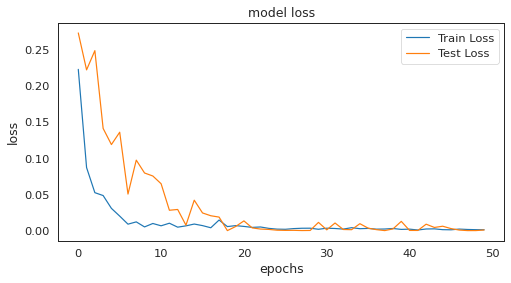

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

<h3>15- Plot the original and predicted train data </h3>

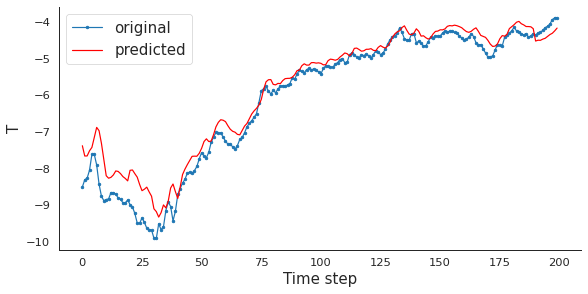

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, trainY[:200], marker='.', label="original")
plt.plot(X_data, trainPredicted[:200], 'r', label="predicted")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('T', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

<h3>16- Plot the original and predicted test data </h3>

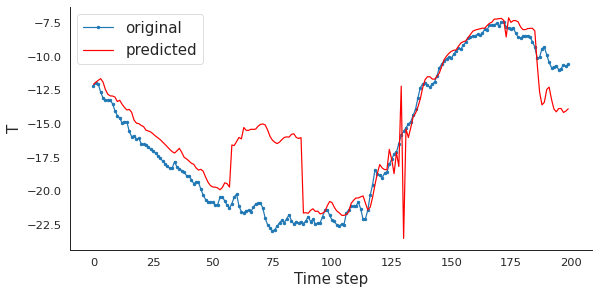

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, testY[:200], marker='.', label="original")
plt.plot(X_data, testPredicted[:200], 'r', label="predicted")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('T', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();